In [2]:
#Importing Libraries

#Twitter Scraping and Data pre-processing
from tqdm.auto import tqdm
import snscrape.modules.twitter as sntwitter
from snscrape.base import ScraperException
import json
import nltk
import pandas as pd
import numpy as np
import mysql.connector
from langdetect import detect
from nltk.corpus import words

#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import datetime as dt


#Data Visualisation
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import re
import string

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

## Loading and getting an impression of the data

In [3]:
cc_tweets_df = pd.read_csv ('climatechange_final.csv')

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
cc_tweets_df

,date,tweet_id,text,replies,retweets,likes,place
0,2021-12-08 23:59:56+00:00,1.468732e+18,Is Meat Really that Bad? [Yes.] https://t.co/A...,0.0,1.0,0.0,NaN
1,2021-12-08 23:59:01+00:00,1.468732e+18,@samanthamaiden @GladysB Not surprising though...,1.0,9.0,11.0,NaN
2,2021-12-08 23:58:00+00:00,1.468732e+18,"@TheRACP climate change report, co-authored by...",0.0,4.0,4.0,NaN
3,2021-12-08 23:57:34+00:00,1.468732e+18,The Paris Agreement: knowledge management and ...,0.0,0.0,0.0,NaN
4,2021-12-08 23:57:28+00:00,1.468731e+18,The Paris Agreement: knowledge management and ...,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
1102328,2021-01-01 00:01:03+00:00,1.344796e+18,Jax Brewery (The Katrina Portraits 3)\nhttps:/...,0.0,3.0,2.0,NaN
1102329,2021-01-01 00:00:43+00:00,1.344796e+18,Carriageway (The Katrina Portraits 4)\nhttps:/...,0.0,2.0,3.0,NaN
1102330,2021-01-01 00:00:22+00:00,1.344796e+18,Marigny Triangle (The Katrina Portraits 5)\nht...,0.0,1.0,1.0,NaN
1102331,2021-01-01 00:00:03+00:00,1.344795e+18,If you’re thinking of making a “green” New Yea...,0.0,0.0,1.0,NaN


In [5]:
cc_tweets_df.dtypes

date         object
tweet_id    float64
text         object
replies     float64
retweets    float64
likes       float64
place        object
dtype: object

In [6]:
cc_tweets_df.isna().sum()

date         131072
tweet_id     131079
text         131079
replies      227920
retweets     227930
likes        227930
place       1085197
dtype: int64

In [7]:
def filter_nonenglish(df):
    tweets=df['text']
    for item in tweets
        if df.text.apply(detect)=='en':
            df['text']=df['text']
            return df

SyntaxError: invalid syntax (3062979292.py, line 3)

In [ ]:
nltk.download('words')
Word = list(set(words.words()))

In [ ]:
cc_tweets_df = cc_tweets_df[cc_tweets_df['text'].str.contains('|'.join(Word))]

In [ ]:
cc_tweets_df['text'] = cc_tweets_df['text'].apply(lambda x: ' '.join([item for item in x.split() if detect(item)=='eng']))

In [ ]:
detect(cc_tweets_df.text)=='es'

In [ ]:
#a function to detect language
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [ ]:
%%time
cc_tweets_df['text'].apply(language_detection)

In [ ]:
#to check raw tweets
cc_tweets_df['text'][468]

In [ ]:
cc_tweets_df['text'][1000]

In [ ]:
cc_tweets_df['text'][600]

In [ ]:
cc_tweets_df['text'][5]

In [ ]:
cc_tweets_df['text'][351]

In [ ]:
cc_tweets_df['text'][1102330]

## Pre-processing 

In [ ]:
def count_duplicated_tweets(df):
    return cc_tweets_df.duplicated(subset='text').sum()
count_duplicated_tweets(cc_tweets_df)

In [8]:
#dropping duplicate tweets inplace 
def duplicate_tweets_drop(df):
    df_duplicates_free=df.drop_duplicates(subset= ['text'], inplace=True)
    return df_duplicates_free
duplicate_tweets_drop(cc_tweets_df)

In [9]:
#removing URL links in tweets
def remove_usernames_links(tweets):
    # Remove any hyperlinks that may be in the text starting with http
    tweets = re.sub('@[^\s]+','',str(tweets))
    tweets = re.sub('http[^\s]+','',str(tweets))
    return tweets

In [10]:
cc_tweets_df['text'] = cc_tweets_df['text'].apply(remove_usernames_links)
cc_tweets_df.shape

(839512, 7)

In [11]:
#downloading english stopwords
stop_words=stopwords.words('english')
#function for removing stopwords from tweets
def remove_stopwords(df):
    df['text'] = df['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
    return(df)

In [12]:
remove_stopwords(cc_tweets_df)

,date,tweet_id,text,replies,retweets,likes,place
0,2021-12-08 23:59:56+00:00,1.468732e+18,Is Meat Really Bad? [Yes.] via This group's mi...,0.0,1.0,0.0,NaN
1,2021-12-08 23:59:01+00:00,1.468732e+18,Not surprising though. Every day #Gladys remai...,1.0,9.0,11.0,NaN
2,2021-12-08 23:58:00+00:00,1.468732e+18,"climate change report, co-authored MCF Deputy ...",0.0,4.0,4.0,NaN
3,2021-12-08 23:57:34+00:00,1.468732e+18,The Paris Agreement: knowledge management clim...,0.0,0.0,0.0,NaN
4,2021-12-08 23:57:28+00:00,1.468731e+18,The Paris Agreement: knowledge management clim...,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
1102328,2021-01-01 00:01:03+00:00,1.344796e+18,Jax Brewery (The Katrina Portraits 3) Grey Cro...,0.0,3.0,2.0,NaN
1102329,2021-01-01 00:00:43+00:00,1.344796e+18,Carriageway (The Katrina Portraits 4) Grey Cro...,0.0,2.0,3.0,NaN
1102330,2021-01-01 00:00:22+00:00,1.344796e+18,Marigny Triangle (The Katrina Portraits 5) Gre...,0.0,1.0,1.0,NaN
1102331,2021-01-01 00:00:03+00:00,1.344795e+18,If you’re thinking making “green” New Year’s r...,0.0,0.0,1.0,NaN


In [13]:
cc_tweets_df.isna().sum()

date             0
tweet_id         1
text             0
replies         11
retweets        14
likes           14
place       822468
dtype: int64

In [14]:
cc_tweets_df.shape

(839512, 7)

In [15]:
def na_drop(df):
    df_na_free= df.dropna(subset=['date', 'tweet_id', 'text', 'replies', 'retweets', 'likes'], inplace=True)
    return df_na_free
na_drop(cc_tweets_df)

In [16]:
cc_tweets_df.isna().sum()

date             0
tweet_id         0
text             0
replies          0
retweets         0
likes            0
place       822454
dtype: int64

## Sentiment Analysis

In [17]:
analyzer = SentimentIntensityAnalyzer()

#using polarity_score ()to get sentiment metrics 
def get_sentiment_scores(text):
    snt = analyzer.polarity_scores(text)
    print("{:-<40} {}".format(text, str(snt)))

In [18]:
def date_type(df):
    df['date']=pd.to_datetime(df['date'], errors='coerce')
    #extracting the date only
    df["date"] = df["date"].dt.date
    return df
date_type(cc_tweets_df)

,date,tweet_id,text,replies,retweets,likes,place
0,2021-12-08,1.468732e+18,Is Meat Really Bad? [Yes.] via This group's mi...,0.0,1.0,0.0,NaN
1,2021-12-08,1.468732e+18,Not surprising though. Every day #Gladys remai...,1.0,9.0,11.0,NaN
2,2021-12-08,1.468732e+18,"climate change report, co-authored MCF Deputy ...",0.0,4.0,4.0,NaN
3,2021-12-08,1.468732e+18,The Paris Agreement: knowledge management clim...,0.0,0.0,0.0,NaN
4,2021-12-08,1.468731e+18,The Paris Agreement: knowledge management clim...,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
1102328,2021-01-01,1.344796e+18,Jax Brewery (The Katrina Portraits 3) Grey Cro...,0.0,3.0,2.0,NaN
1102329,2021-01-01,1.344796e+18,Carriageway (The Katrina Portraits 4) Grey Cro...,0.0,2.0,3.0,NaN
1102330,2021-01-01,1.344796e+18,Marigny Triangle (The Katrina Portraits 5) Gre...,0.0,1.0,1.0,NaN
1102331,2021-01-01,1.344795e+18,If you’re thinking making “green” New Year’s r...,0.0,0.0,1.0,NaN


In [19]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [20]:
%%time
cc_tweets_df['text'].apply(negative_score)

CPU times: user 1min 15s, sys: 119 ms, total: 1min 15s
Wall time: 1min 15s


0          0.287
1          0.059
2          0.125
3          0.000
4          0.000
           ...  
1102328    0.000
1102329    0.000
1102330    0.000
1102331    0.000
1102332    0.000
Name: text, Length: 839498, dtype: float64

In [21]:
cc_tweets_df['sentiment_neg'] = cc_tweets_df['text'].apply(negative_score)

In [22]:
cc_tweets_df

,date,tweet_id,text,replies,retweets,likes,place,sentiment_neg
0,2021-12-08,1.468732e+18,Is Meat Really Bad? [Yes.] via This group's mi...,0.0,1.0,0.0,NaN,0.287
1,2021-12-08,1.468732e+18,Not surprising though. Every day #Gladys remai...,1.0,9.0,11.0,NaN,0.059
2,2021-12-08,1.468732e+18,"climate change report, co-authored MCF Deputy ...",0.0,4.0,4.0,NaN,0.125
3,2021-12-08,1.468732e+18,The Paris Agreement: knowledge management clim...,0.0,0.0,0.0,NaN,0.000
4,2021-12-08,1.468731e+18,The Paris Agreement: knowledge management clim...,0.0,0.0,0.0,NaN,0.000
...,...,...,...,...,...,...,...,...
1102328,2021-01-01,1.344796e+18,Jax Brewery (The Katrina Portraits 3) Grey Cro...,0.0,3.0,2.0,NaN,0.000
1102329,2021-01-01,1.344796e+18,Carriageway (The Katrina Portraits 4) Grey Cro...,0.0,2.0,3.0,NaN,0.000
1102330,2021-01-01,1.344796e+18,Marigny Triangle (The Katrina Portraits 5) Gre...,0.0,1.0,1.0,NaN,0.000
1102331,2021-01-01,1.344795e+18,If you’re thinking making “green” New Year’s r...,0.0,0.0,1.0,NaN,0.000


In [23]:
%%time

cc_tweets_df['sentiment_neg'] = cc_tweets_df['text'].apply(negative_score)
cc_tweets_df['sentiment_neu'] = cc_tweets_df['text'].apply(neutral_score)
cc_tweets_df['sentiment_pos'] = cc_tweets_df['text'].apply(positive_score)
cc_tweets_df['sentiment_compound'] = cc_tweets_df['text'].apply(compound_score)

CPU times: user 5min, sys: 596 ms, total: 5min 1s
Wall time: 5min 1s


In [24]:
cc_tweets_df.describe()

,tweet_id,replies,retweets,likes,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
count,8.394980e+05,839498.000000,839498.000000,839498.000000,839498.000000,839498.000000,839498.000000,839498.000000
mean,1.410780e+18,0.438265,2.479861,6.250291,0.071864,0.806190,0.121943,0.123978
std,3.608828e+16,10.197360,42.848974,168.273829,0.109873,0.158557,0.132007,0.457809
min,1.344795e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.999300
25%,1.380157e+18,0.000000,0.000000,0.000000,0.000000,0.695000,0.000000,-0.077200
50%,1.413411e+18,0.000000,0.000000,1.000000,0.000000,0.814000,0.096000,0.000000
75%,1.443469e+18,0.000000,2.000000,3.000000,0.125000,1.000000,0.205000,0.493900
max,1.468732e+18,7264.000000,31398.000000,131508.000000,0.986000,1.000000,0.914000,0.999400


In [33]:
cc_tweets_df.groupby(['date']).mean()


,tweet_id,replies,retweets,likes,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,mean,rolling
date,,,,,,,,,,
2021-01-01,1.345002e+18,0.541640,2.270497,7.059393,0.070680,0.795449,0.133868,0.162199,0.123931,0.160294
2021-01-02,1.345358e+18,0.366113,2.317608,5.112292,0.066508,0.809961,0.123537,0.125016,0.123911,0.125339
2021-01-03,1.345726e+18,0.466901,3.079672,6.562390,0.073214,0.794863,0.131920,0.131105,0.123912,0.130571
2021-01-04,1.346096e+18,0.330287,2.140424,5.164105,0.062663,0.806003,0.131337,0.156819,0.123835,0.157708
2021-01-05,1.346443e+18,0.442136,2.189063,5.181009,0.061479,0.808236,0.130281,0.166650,0.123744,0.166934
...,...,...,...,...,...,...,...,...,...,...
2021-12-04,1.467119e+18,0.350375,2.103613,4.798909,0.078872,0.817362,0.103756,0.047739,0.145394,0.046796
2021-12-05,1.467481e+18,0.623960,3.212146,7.187188,0.061900,0.805487,0.132616,0.165183,0.156458,0.168567
2021-12-06,1.467856e+18,0.286555,2.253189,4.842002,0.063815,0.810665,0.125510,0.156078,0.156100,0.155825


In [26]:
#storing dataframe of scraped tweets in a csv file 
#cc_tweets_df.to_csv("cc_semiclean_tableau.csv", index=False)

In [34]:
cc_tweets_df['mean'] = cc_tweets_df['sentiment_compound'].expanding().mean()
cc_tweets_df['rolling'] = cc_tweets_df['sentiment_compound'].rolling(50).mean()

/opt/anaconda3/envs/DA_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


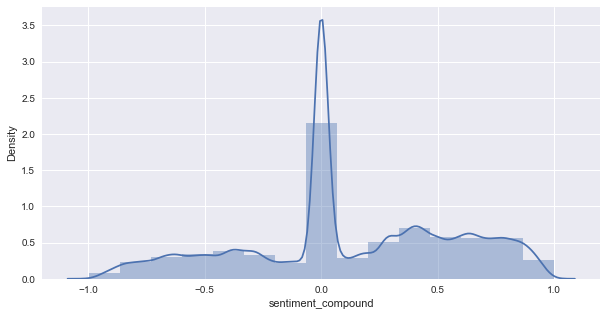

In [35]:
#quick and dirty hist of compound sentiment values 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(cc_tweets_df['sentiment_compound'], bins=15, ax=ax)
plt.show()


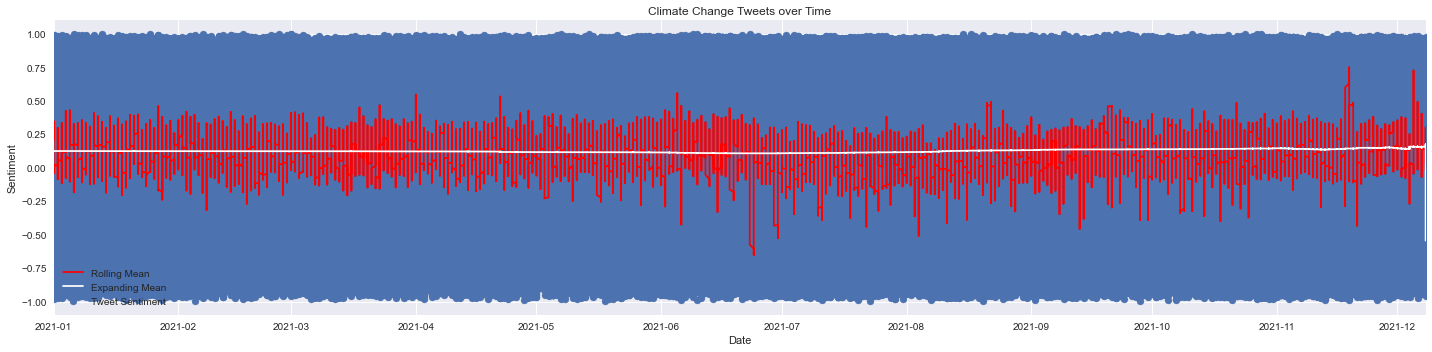

In [36]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(cc_tweets_df['date'],cc_tweets_df['sentiment_compound'], label='Tweet Sentiment')
ax.plot(cc_tweets_df['date'],cc_tweets_df['rolling'], color ='r', label='Rolling Mean')
ax.plot(cc_tweets_df['date'],cc_tweets_df['mean'], color='w', label='Expanding Mean')
ax.set_xlim([dt.date(2021,1,1),dt.date(2021,12,8)])
ax.set(title='Climate Change Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')

fig.tight_layout()
plt.show()

In [30]:
ot = cc_tweets_df.sample(frac=.1, random_state=1111)
ot.sort_index(inplace=True)
ot['mean'] = ot['sentiment_compound'].expanding().mean()
ot['rolling'] = ot['sentiment_compound'].rolling(6).mean()

In [ ]:

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(cc_tweets_df['date'],cc_tweets_df['sentiment_compound'], label='Tweet Sentiment')
ax.plot(cc_tweets_df['date'],cc_tweets_df['rolling'], color ='r', label='Rolling Mean')
ax.plot(cc_tweets_df['date'],cc_tweets_df['mean'], color='w', label='Expanding Mean')
ax.set_xlim([dt.date(2021,1,1),dt.date(2021,12,8)])
ax.set(title='Climate Change Tweets over Sample Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')

fig.tight_layout()
plt.show()



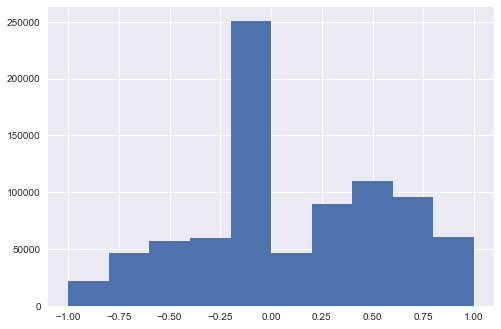

In [170]:

cc_tweets_df['sentiment_compound'].hist();

In [164]:
cc_tweets_df['text'][468]

'And military creates huge amount #climatechange. Why can’t fight real war, one protect planet #FossilFuels destroying it.'

In [ ]:


# make up some data
x = cc_tweets_df['date']
y = []

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [139]:
def plot_wordcloud(wordcloud, title):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(title + ' Tweets\n', fontsize=18, fontweight='bold')
    plt.show()

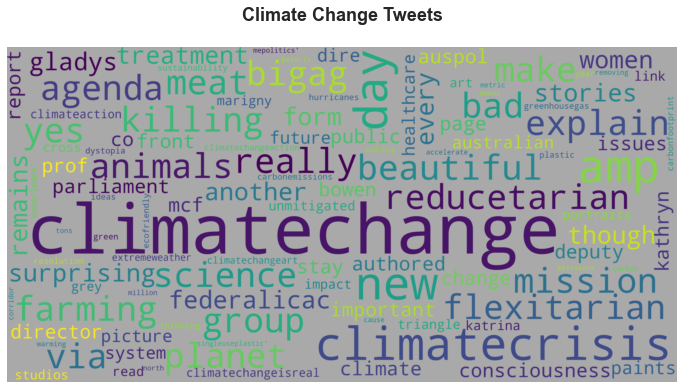

In [162]:
text = (cc_tweets_df['text'].str.lower()).values
wordcloud = WordCloud(max_font_size=None,
                      max_words=200,
                      background_color="darkgrey", 
                      width=4000,
                      height=2000,
                      stopwords=stopwords.words('english')).generate(str(text))

plot_wordcloud(wordcloud, 'Climate Change')